<a href="https://colab.research.google.com/github/ANJUMNAIR/Qureos-Coffehouse-Customer-Retention/blob/main/Queros_Coffe_house_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPROVE CUSTOMER RETENTION WITH DATA**

##Code

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
df = pd.read_excel("/content/coffee-house-satisfactory-survey.xlsx")

In [ ]:
df.head()

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Coffee House?,6. How do you usually enjoy Coffee House?,7. How much time do you normally spend during your visit?,8. The nearest Coffee House's outlet to you is...?,9. Do you have Coffee House membership card?,...,"11. On average, how much would you spend at Coffee House per visit?","12. How would you rate the quality of Coffee House compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Coffee House?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Coffee House? (lighting, music, etc...)",16. You rate the WiFi quality at Coffee House as..,"17. How would you rate the service at Coffee House? (Promptness, friendliness, etc..)",18. How likely you will choose Coffee House for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Coffee House? Check all that apply.,20. Will you continue buying Coffee House?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [ ]:
df.columns

Index(['Timestamp', '1. Your Gender', '2. Your Age',
       '3. Are you currently....?', '4. What is your annual income?',
       '5. How often do you visit Coffee House?',
       '6. How do you usually enjoy Coffee House?',
       '7. How much time do you normally  spend during your visit?',
       '8. The nearest Coffee House's outlet to you is...?',
       '9. Do you have Coffee House membership card?',
       '10. What do you most frequently purchase at Coffee House?',
       '11. On average, how much would you spend at Coffee House per visit?',
       '12. How would you rate the quality of Coffee House compared to other brands (Coffee Bean, Old Town White Coffee..) to be:',
       '13. How would you rate the price range at Coffee House?',
       '14. How important are sales and promotions in your purchase decision?',
       '15. How would you rate the ambiance at Coffee House? (lighting, music, etc...)',
       '16. You rate the WiFi quality at Coffee House as..',
       '17. How 

#DATA CLEANING

In [ ]:
df.isnull().sum()

Timestamp                                                                                                                    0
1. Your Gender                                                                                                               0
2. Your Age                                                                                                                  0
3. Are you currently....?                                                                                                    0
4. What is your annual income?                                                                                               0
5. How often do you visit Coffee House?                                                                                      0
6. How do you usually enjoy Coffee House?                                                                                    1
7. How much time do you normally  spend during your visit?                                                     

**Define the new headers**

In [ ]:
new_headers = [
    'Timestamp',
    'Gender',
    'Age',
    'Job status',
    'Annual Income',
    'Visit Frequency',
    'Type of Dining',
    'Time Spend in outelt',
    'Nearest Outlet',
    'Membership Card',
    'Frequently Purchased Items',
    'Average Time Spend',
    'Quality Rating',
    'Price Rating',
    'Promotion Importance',
    'Wifi Rating',
    'Ambience Rating',
    'Service Rating',
    'Meeting Likelihood',
    'Promotion Awareness',
    'Chance of Visiting Again'
]

**Assign the new headers to the data frame**

In [ ]:
new_df = df

In [ ]:
new_df.columns = new_headers

In [ ]:
new_df.shape

(122, 21)

In [ ]:
new_df = new_df.drop(columns=['Timestamp'])

In [ ]:
new_df['Chance of Visiting Again'].value_counts()

Yes    94
No     28
Name: Chance of Visiting Again, dtype: int64

In [ ]:
new_df.dtypes


Gender                        object
Age                           object
Job status                    object
Annual Income                 object
Visit Frequency               object
Type of Dining                object
Time Spend in outelt          object
Nearest Outlet                object
Membership Card               object
Frequently Purchased Items    object
Average Time Spend            object
Quality Rating                 int64
Price Rating                   int64
Promotion Importance           int64
Wifi Rating                    int64
Ambience Rating                int64
Service Rating                 int64
Meeting Likelihood             int64
Promotion Awareness           object
Chance of Visiting Again      object
dtype: object

In [ ]:
# Make a copy of the original DataFrame
transformed_df = df.copy()
# Encode "Gender" to binary values (1 for Male, 0 for Female)
transformed_df['Gender (Binary)'] = transformed_df['Gender'].map({'Male': 1, 'Female': 0})
# Encode "Continue Purchasing" to binary values (1 for Yes, 0 for No)
transformed_df['Chance of Visiting Again (Binary)'] = transformed_df['Chance of Visiting Again'].map({'Yes': 1, 'No': 0})
# Now, 'over_transformed_df' contains the original data with "Gender" and "Continue Purchasing" columns binary

In [ ]:
# Encode the "Age" column into numerical values using midpoint approach
transformed_df['Age'] = transformed_df['Age'].map({
    'Below 20': 20,
    'From 20 to 29': 25,
    'From 30 to 39': 35,
    '40 and above': 45
})

In [ ]:
# Encode the "Annual Income" column into numerical values using midpoint approach
transformed_df['Annual Income'] = transformed_df['Annual Income'].map({
    'Less than RM25,000': 20000,
    'RM25,000 - RM50,000': 37500,
    'RM50,000 - RM100,000': 75000,
    'RM100,000 - RM150,000': 125000,
    'More than RM150,000': 175000
})

In [ ]:
# Create a function to convert visit frequency to the number of days
def convert_visit_frequency_to_days(frequency):
    if frequency == 'Never':
        return 0
    elif frequency == 'Rarely':
        return 1 # You can assign a specific value for "Rarely" based on your definition
    elif frequency == 'Monthly':
        return 30
    elif frequency == 'Weekly':
        return 7
    elif frequency == 'Daily':
        return 1
    else:
        return None # Handle any other values as needed
# Apply the conversion function to create the "Visit Frequency Days" column
transformed_df['Visit Frequency Days'] = transformed_df['Visit Frequency'].apply(convert_visit_frequency_to_days)
# You can drop the original "Visit Frequency" column if you don't need it
transformed_df.drop(columns=['Visit Frequency'], inplace=True)

In [ ]:
# Create a function to convert visit duration to minutes
def convert_visit_duration_to_minutes(duration):
    if duration == 'Below 30 minutes':
        return 15
    elif duration == 'Between 30 minutes to 1 hour':
        return 45
    elif duration == 'Between 1 hour to 2 hours':
        return 90
    elif duration == 'Between 2 hours to 3 hours':
        return 150
    elif duration == 'More than 3 hours':
        return 210
    else:
        return None # Handle any other values as needed
# Apply the conversion function to create the "Visit Duration (minutes)" column
transformed_df['Time Spend in outelt (minutes)'] = transformed_df['Time Spend in outelt'].apply(convert_visit_duration_to_minutes)
# You can drop the original "Visit Duration" column if you don't need it
transformed_df.drop(columns=['Time Spend in outelt'], inplace=True)


In [ ]:
# Create a function to convert nearest outlet distance to kilometers
def convert_nearest_outlet_distance_to_km(distance):
    if distance == 'within 1km':
        return 0.5 # Midpoint within 1km
    elif distance == '1km - 3km':
        return 2.0 # Midpoint between 1km and 3km
    elif distance == 'more than 3km':
        return 4.0 # Midpoint for more than 3km
    else:
        return None # Handle any other values as needed
# Apply the conversion function to create the "Distance to Nearest Outlet (km)" column
transformed_df['Distance to Nearest Outlet (km)'] = transformed_df['Nearest Outlet'].apply(convert_nearest_outlet_distance_to_km)
# You can drop the original "Nearest Outlet" column if you don't need it
transformed_df.drop(columns=['Nearest Outlet'], inplace=True)


In [ ]:
# Create a function to convert "Membership Card" to binary values
def convert_membership_card(card):
    if card == 'Yes':
        return 1
    elif card == 'No':
        return 0
    else:
        return None # Handle any other values as needed
# Apply the conversion function to create the "Membership Card (Binary)" column
transformed_df['Membership Card (Binary)'] = transformed_df['Membership Card'].apply(convert_membership_card)
# You can drop the original "Membership Card" column if you don't need it
transformed_df.drop(columns=['Membership Card'], inplace=True)

In [ ]:
# Create a function to convert average spending to numerical values (RM)
def convert_average_spending_to_rm(spending):
    if spending == 'Less than RM20':
        return 20
    elif spending == 'Around RM20 - RM40':
        return 30
    elif spending == 'Zero':
        return 0
    elif spending == 'More than RM40':
        return 50
    else:
        return None # Handle any other values as needed
# Apply the conversion function to create the "Average Spending (RM)" column
transformed_df['Average Time Spend(RM)'] = transformed_df['Average Time Spend'].apply(convert_average_spending_to_rm)
# You can drop the original "Average Spending" column if you don't need it
transformed_df.drop(columns=['Average Time Spend'], inplace=True)


In [ ]:
transformed_df.drop(columns=['Timestamp'], inplace=True)


In [ ]:
transformed_df.dtypes

Gender                                object
Age                                    int64
Job status                            object
Annual Income                          int64
Type of Dining                        object
Frequently Purchased Items            object
Quality Rating                         int64
Price Rating                           int64
Promotion Importance                   int64
Wifi Rating                            int64
Ambience Rating                        int64
Service Rating                         int64
Meeting Likelihood                     int64
Promotion Awareness                   object
Chance of Visiting Again              object
Gender (Binary)                        int64
Chance of Visiting Again (Binary)      int64
Visit Frequency Days                   int64
Time Spend in outelt (minutes)         int64
Distance to Nearest Outlet (km)      float64
Membership Card (Binary)               int64
Average Time Spend(RM)                 int64
dtype: obj

In [ ]:
transformed_df.isnull().sum()

Gender                               0
Age                                  0
Job status                           0
Annual Income                        0
Type of Dining                       1
Frequently Purchased Items           0
Quality Rating                       0
Price Rating                         0
Promotion Importance                 0
Wifi Rating                          0
Ambience Rating                      0
Service Rating                       0
Meeting Likelihood                   0
Promotion Awareness                  1
Chance of Visiting Again             0
Gender (Binary)                      0
Chance of Visiting Again (Binary)    0
Visit Frequency Days                 0
Time Spend in outelt (minutes)       0
Distance to Nearest Outlet (km)      0
Membership Card (Binary)             0
Average Time Spend(RM)               0
dtype: int64

In [ ]:
transformed_df


,Gender,Age,Job status,Annual Income,Type of Dining,Frequently Purchased Items,Quality Rating,Price Rating,Promotion Importance,Wifi Rating,...,Meeting Likelihood,Promotion Awareness,Chance of Visiting Again,Gender (Binary),Chance of Visiting Again (Binary),Visit Frequency Days,Time Spend in outelt (minutes),Distance to Nearest Outlet (km),Membership Card (Binary),Average Time Spend(RM)
0,Female,25,Student,20000,Dine in,Coffee,4,3,5,5,...,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes,0,1,1,45,0.5,1,20
1,Female,25,Student,20000,Take away,Cold drinks;Pastries,4,3,4,4,...,2,Social Media;In Store displays,Yes,0,1,1,15,2.0,1,20
2,Male,25,Employed,20000,Dine in,Coffee,4,3,4,4,...,3,In Store displays;Billboards,Yes,1,1,30,45,4.0,1,20
3,Female,25,Student,20000,Take away,Coffee,2,1,4,3,...,3,Through friends and word of mouth,No,0,0,1,15,4.0,0,20
4,Male,25,Student,20000,Take away,Coffee;Sandwiches,3,3,4,2,...,3,Starbucks Website/Apps;Social Media,Yes,1,1,30,45,2.0,0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Male,45,Self-employed,37500,Dine in,Coffee,3,3,5,3,...,4,Starbucks Website/Apps;Social Media,Yes,1,1,30,90,2.0,1,30
118,Male,25,Employed,20000,Dine in,Coffee;Cold drinks;Juices;Pastries;Sandwiches,5,5,5,5,...,5,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes,1,1,30,90,2.0,1,50
119,Male,25,Student,20000,Dine in,Coffee;Cold drinks,3,2,4,3,...,4,Social Media;Through friends and word of mouth...,No,1,0,1,45,2.0,0,20
120,Female,25,Employed,20000,Take away,Coffee,4,4,4,4,...,4,Social Media;Through friends and word of mouth...,Yes,0,1,1,15,0.5,0,20


In [ ]:
# Separate categorical and numerical columns
categorical_columns = transformed_df.select_dtypes(include=['object']).columns
numerical_columns = transformed_df.select_dtypes(exclude=['object']).columns
# Create the categorical dataset
categorical_data = transformed_df[categorical_columns]
# Create the numerical dataset
numerical_data = transformed_df[numerical_columns]

In [ ]:
categorical_data

,Gender,Job status,Type of Dining,Frequently Purchased Items,Promotion Awareness,Chance of Visiting Again
0,Female,Student,Dine in,Coffee,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,Female,Student,Take away,Cold drinks;Pastries,Social Media;In Store displays,Yes
2,Male,Employed,Dine in,Coffee,In Store displays;Billboards,Yes
3,Female,Student,Take away,Coffee,Through friends and word of mouth,No
4,Male,Student,Take away,Coffee;Sandwiches,Starbucks Website/Apps;Social Media,Yes
...,...,...,...,...,...,...
117,Male,Self-employed,Dine in,Coffee,Starbucks Website/Apps;Social Media,Yes
118,Male,Employed,Dine in,Coffee;Cold drinks;Juices;Pastries;Sandwiches,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
119,Male,Student,Dine in,Coffee;Cold drinks,Social Media;Through friends and word of mouth...,No
120,Female,Employed,Take away,Coffee,Social Media;Through friends and word of mouth...,Yes


In [ ]:
numerical_data

,Age,Annual Income,Quality Rating,Price Rating,Promotion Importance,Wifi Rating,Ambience Rating,Service Rating,Meeting Likelihood,Gender (Binary),Chance of Visiting Again (Binary),Visit Frequency Days,Time Spend in outelt (minutes),Distance to Nearest Outlet (km),Membership Card (Binary),Average Time Spend(RM)
0,25,20000,4,3,5,5,4,4,3,0,1,1,45,0.5,1,20
1,25,20000,4,3,4,4,4,5,2,0,1,1,15,2.0,1,20
2,25,20000,4,3,4,4,4,4,3,1,1,30,45,4.0,1,20
3,25,20000,2,1,4,3,3,3,3,0,0,1,15,4.0,0,20
4,25,20000,3,3,4,2,2,3,3,1,1,30,45,2.0,0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,45,37500,3,3,5,3,2,4,4,1,1,30,90,2.0,1,30
118,25,20000,5,5,5,5,5,5,5,1,1,30,90,2.0,1,50
119,25,20000,3,2,4,3,3,3,4,1,0,1,45,2.0,0,20
120,25,20000,4,4,4,4,4,4,4,0,1,1,15,0.5,0,20


In [ ]:
numerical_data.dtypes

Age                                    int64
Annual Income                          int64
Quality Rating                         int64
Price Rating                           int64
Promotion Importance                   int64
Wifi Rating                            int64
Ambience Rating                        int64
Service Rating                         int64
Meeting Likelihood                     int64
Gender (Binary)                        int64
Chance of Visiting Again (Binary)      int64
Visit Frequency Days                   int64
Time Spend in outelt (minutes)         int64
Distance to Nearest Outlet (km)      float64
Membership Card (Binary)               int64
Average Time Spend(RM)                 int64
dtype: object

#DATA EXPLORATION

In [ ]:
numerical_data.corr()['Chance of Visiting Again (Binary)']

Age                                  0.102143
Annual Income                       -0.005966
Quality Rating                       0.407319
Price Rating                         0.452593
Promotion Importance                 0.112402
Wifi Rating                          0.318145
Ambience Rating                      0.165734
Service Rating                       0.209820
Meeting Likelihood                   0.369625
Gender (Binary)                      0.003202
Chance of Visiting Again (Binary)    1.000000
Visit Frequency Days                 0.263433
Time Spend in outelt (minutes)      -0.081793
Distance to Nearest Outlet (km)     -0.106077
Membership Card (Binary)             0.341955
Average Time Spend(RM)               0.409694
Name: Chance of Visiting Again (Binary), dtype: float64

Correlation Heatmap for Numerical Data

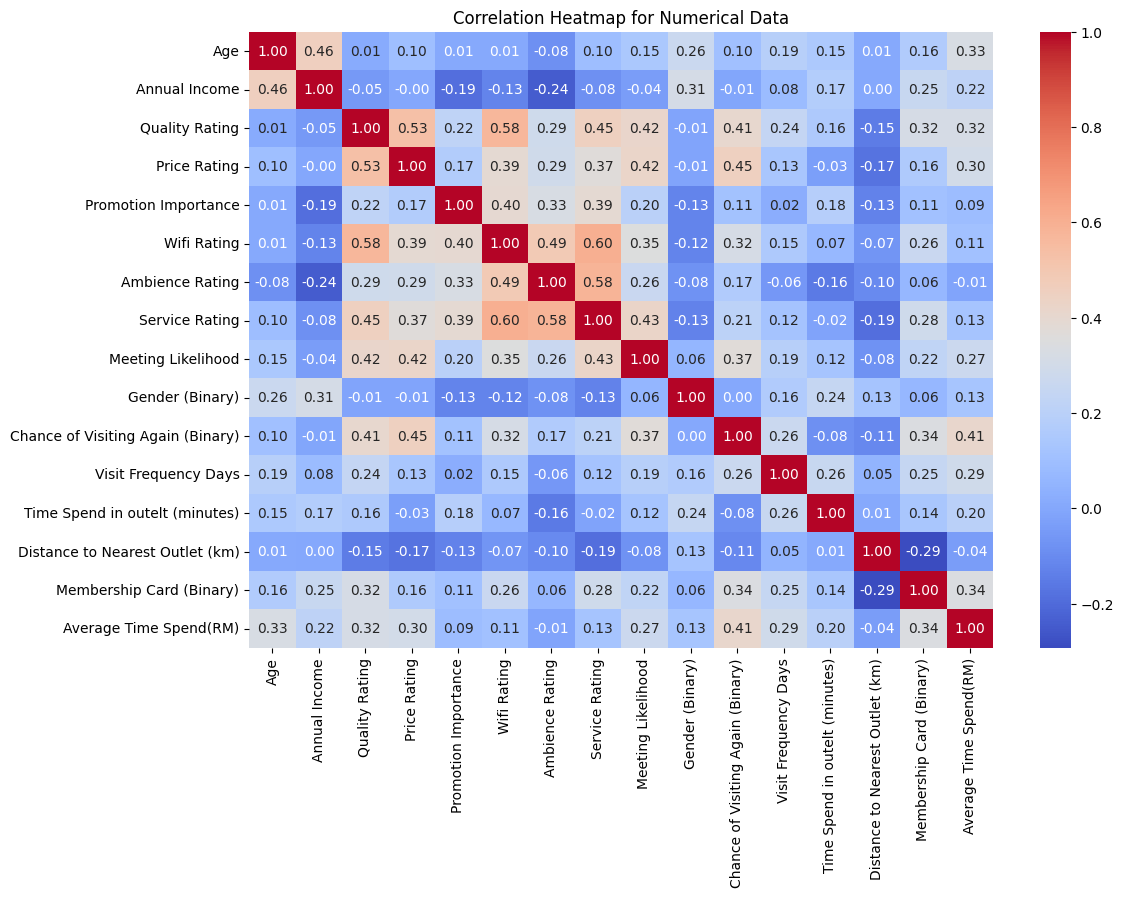

In [ ]:
numerical_corr = numerical_data.corr()
# Create a heatmap for numerical data
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Numerical Data")
plt.show()


In [ ]:
# Copy your categorical dataset
categorical_data_copy = categorical_data.copy()

In [ ]:
# Encode categorical variables to numerical values
label_encoders = {}
for column in categorical_data_copy.columns:
    le = LabelEncoder()
    categorical_data_copy[column] = le.fit_transform(categorical_data_copy[column])
    label_encoders[column] = le

In [ ]:
# Create a function to calculate Cramer's V statistic for association
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [ ]:
# Create an empty DataFrame to store Cramer's V values
cramer_v_values = pd.DataFrame(index=categorical_data_copy.columns, columns=categorical_data_copy.columns)

In [ ]:
# Calculate Cramer's V for all pairs of categorical variables
for col1 in categorical_data_copy.columns:
  for col2 in categorical_data_copy.columns:
    if col1 != col2:
      cramer_v = cramers_v(categorical_data_copy[col1], categorical_data_copy[col2])
      cramer_v_values.loc[col1, col2] = cramer_v

In [ ]:
# Display the table of associations (Cramer's V values) between categorical variables
cramer_v_values


,Gender,Job status,Type of Dining,Frequently Purchased Items,Promotion Awareness,Chance of Visiting Again
Gender,NaN,0.099854,0.10899,0.0,0.180348,0.0
Job status,0.099854,NaN,0.0,0.315262,0.372565,0.118709
Type of Dining,0.10899,0.0,NaN,0.692824,0.445696,0.161667
Frequently Purchased Items,0.0,0.315262,0.692824,NaN,0.476665,0.070268
Promotion Awareness,0.180348,0.372565,0.445696,0.476665,NaN,0.322392
Chance of Visiting Again,0.0,0.118709,0.161667,0.070268,0.322392,NaN


Countplot to visualize "Gender" vs "Chance of Visiting Again"

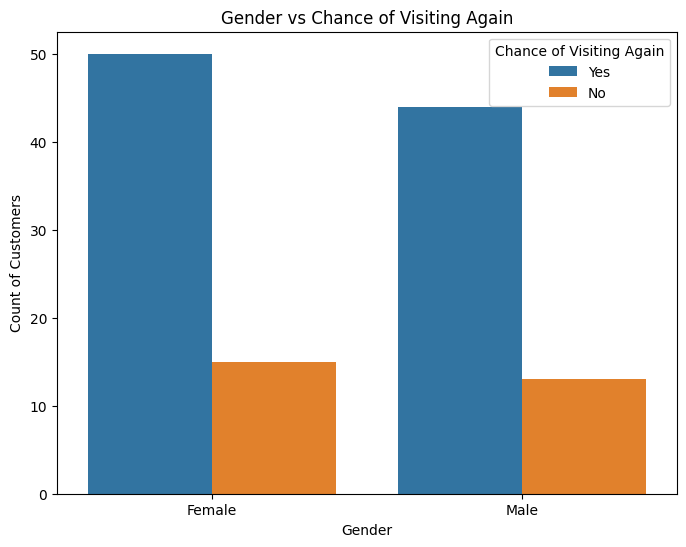

In [ ]:
# Create a countplot to visualize "Gender" vs "Chance of Visiting Again"
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Chance of Visiting Again', data=new_df)
plt.xlabel('Gender')
plt.ylabel('Count of Customers')
plt.title('Gender vs Chance of Visiting Again')
plt.legend(title='Chance of Visiting Again', loc='upper right', labels=['Yes', 'No'])
plt.show()


countplot to visualize "Age" vs "Chance of Visiting Again"


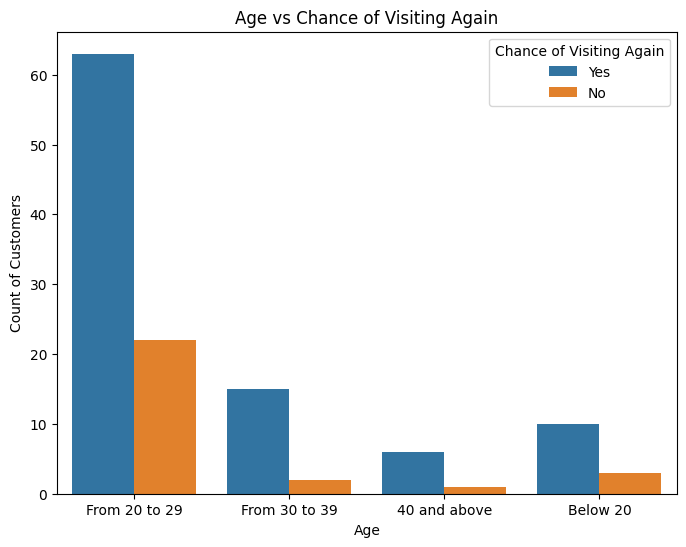

In [ ]:
# Create a countplot to visualize "Age" vs "Chance of Visiting Again"
plt.figure(figsize=(8, 6))
sns.countplot(x='Age', hue='Chance of Visiting Again', data=new_df)
plt.xlabel('Age')
plt.ylabel('Count of Customers')
plt.title('Age vs Chance of Visiting Again')
plt.legend(title='Chance of Visiting Again', loc='upper right', labels=['Yes', 'No'])
plt.show()

Countplot to visualize "Visit Frequency" vs "Chance of Visiting Again"

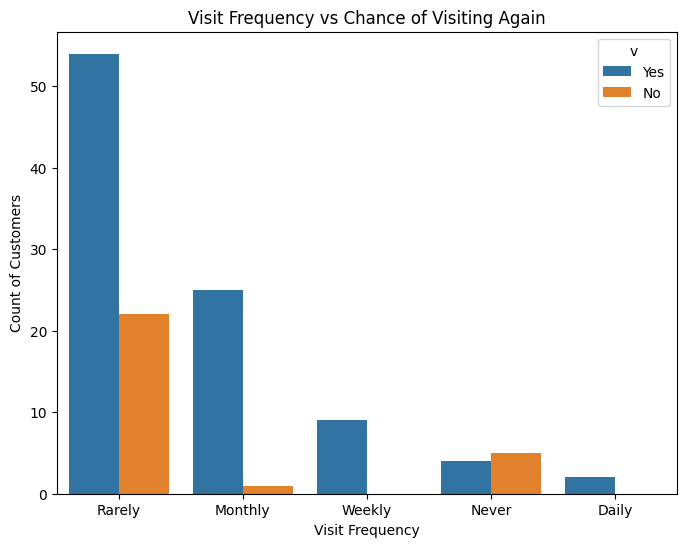

In [ ]:
# Create a countplot to visualize "Visit Frequency" vs "Chance of Visiting Again"
plt.figure(figsize=(8, 6))
sns.countplot(x='Visit Frequency', hue='Chance of Visiting Again', data=new_df)
plt.xlabel('Visit Frequency')
plt.ylabel('Count of Customers')
plt.title('Visit Frequency vs Chance of Visiting Again')
plt.legend(title='v', loc='upper right', labels=['Yes', 'No'])
plt.show()

Countplot to visualize "Annual Income" vs "Chance of Visiting Again"

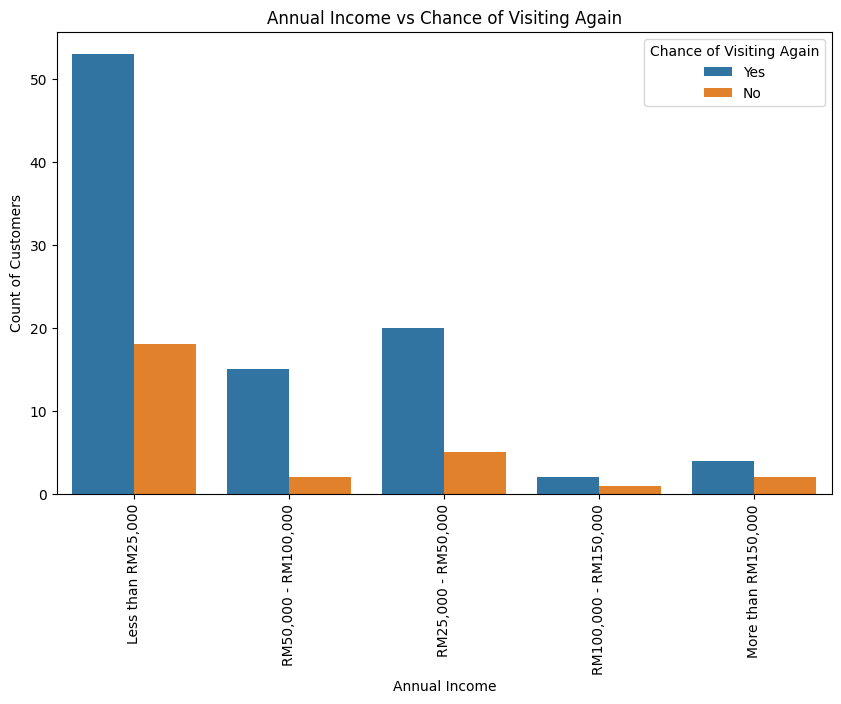

In [ ]:
# Create a countplot to visualize "Annual Income" vs "Chance of Visiting Again"
plt.figure(figsize=(10, 6))
sns.countplot(x='Annual Income', hue='Chance of Visiting Again', data=new_df)
plt.xlabel('Annual Income')
plt.ylabel('Count of Customers')
plt.title('Annual Income vs Chance of Visiting Again')
plt.xticks(rotation=90)
plt.legend(title='Chance of Visiting Again', loc='upper right', labels=['Yes', 'No'])
plt.show()

Countplot to visualize "Time Spend in outelt" vs "Chance of Visiting Again"

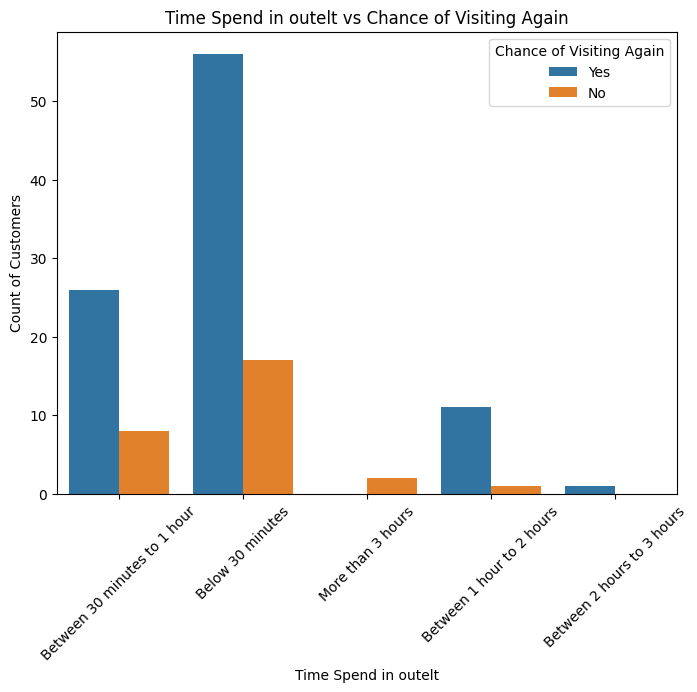

In [ ]:
# Create a countplot to visualize "Time Spend in outelt" vs "Chance of Visiting Again"
plt.figure(figsize=(8, 6))
sns.countplot(x='Time Spend in outelt', hue='Chance of Visiting Again', data=new_df)
plt.xlabel('Time Spend in outelt')
plt.ylabel('Count of Customers')
plt.title('Time Spend in outelt vs Chance of Visiting Again')
plt.legend(title='Chance of Visiting Again', loc='upper right', labels=['Yes', 'No'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Define the bin ranges for Distance to Nearest Outlet
bin_ranges = [0, 1, 3, float('inf')]

In [ ]:
# Define bin labels
bin_labels = ['< 1km', '1km - 3km', '3km+']

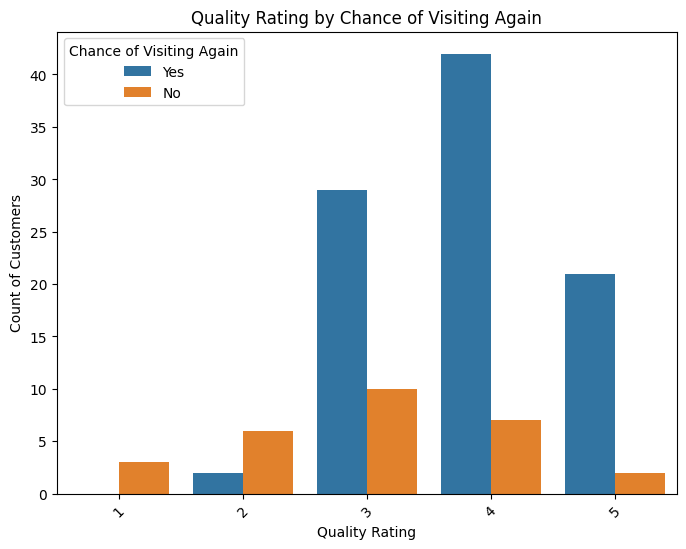

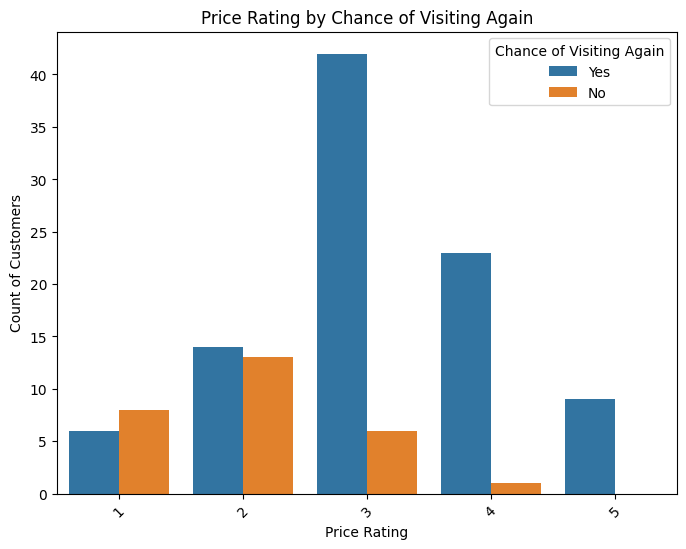

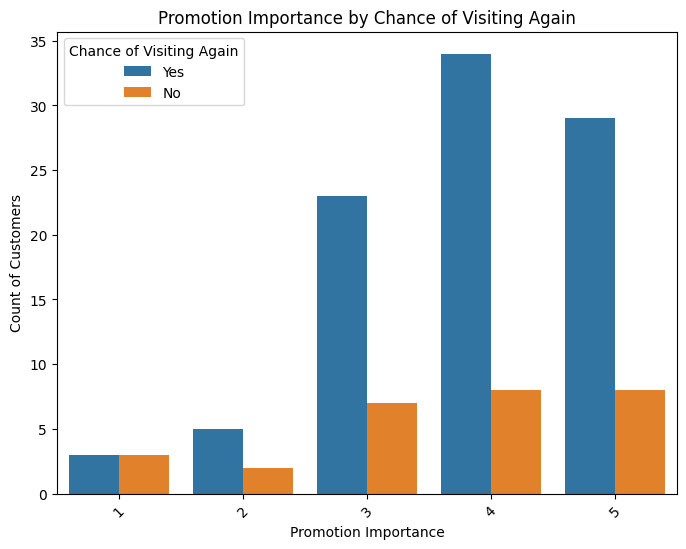

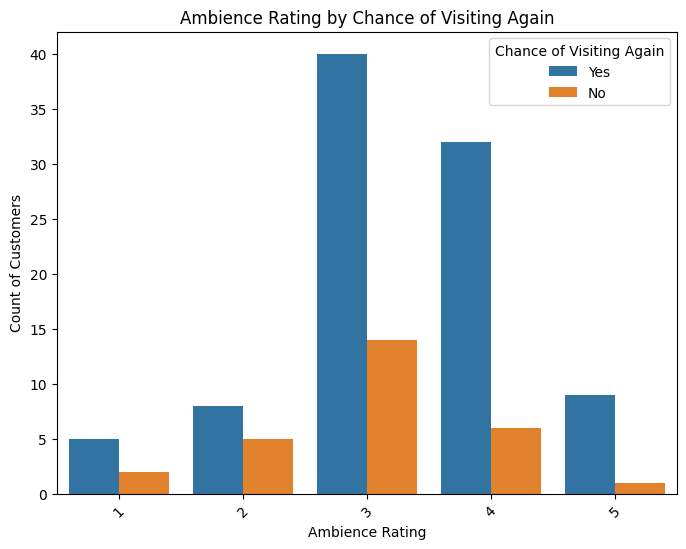

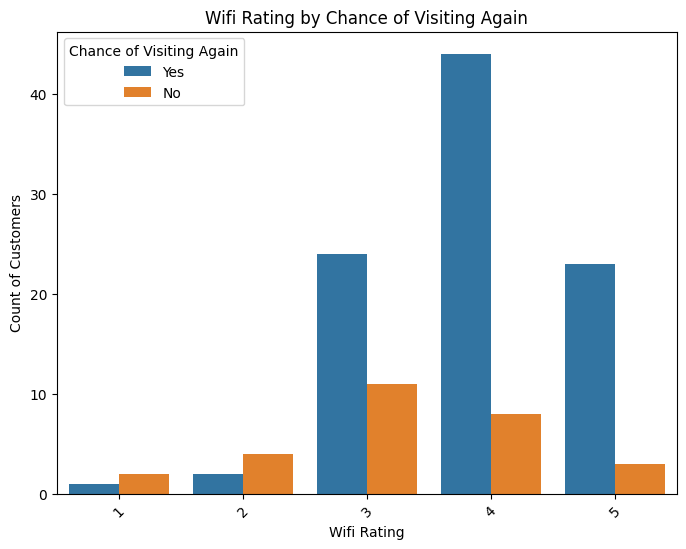

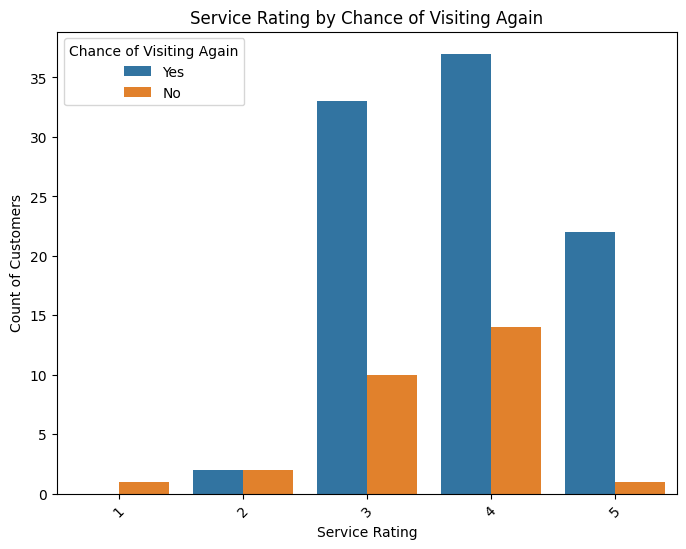

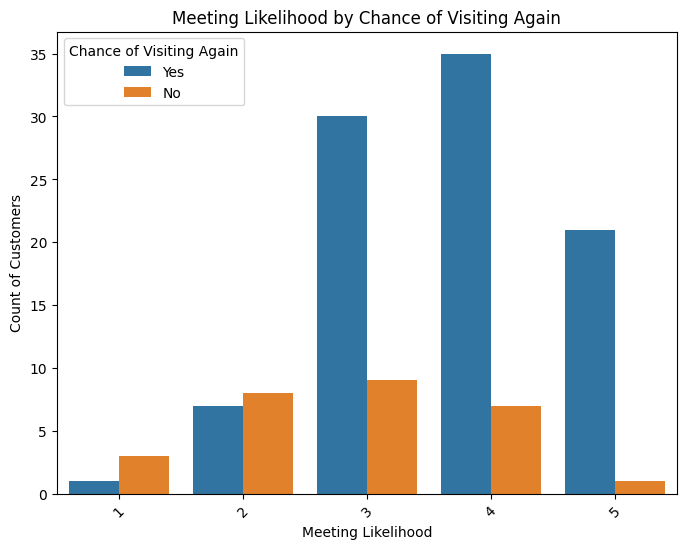

In [ ]:
# Define the list of numerical variables to visualize
numerical_variables = ['Quality Rating', 'Price Rating', 'Promotion Importance',
'Ambience Rating', 'Wifi Rating', 'Service Rating', 'Meeting Likelihood']
# Create separate bar plots for each numerical variable
for variable in numerical_variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=variable, hue='Chance of Visiting Again', data=new_df)
    plt.xlabel(variable)
    plt.ylabel('Count of Customers')
    plt.title(f'{variable} by Chance of Visiting Again')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# Split items on semicolon and create a list of items
new_df['Frequently Purchased Items'] = new_df['Frequently Purchased Items'].str.split(';')

In [ ]:
new_df = new_df.explode('Frequently Purchased Items')

In [ ]:
# Replace specified values with 'Prefer no to buy'
new_df['Frequently Purchased Items'] = new_df['Frequently Purchased Items'].replace(['Never', 'Never buy any', 'Prefer no to buy'])

In [ ]:
# Replace specified values with 'Prefer no to go'
new_df['Type of Dining'] = new_df['Type of Dining'].replace(['Never', 'Never buy', 'never', 'I dont like coffee'])

In [ ]:
item_counts = new_df['Frequently Purchased Items'].value_counts()

In [ ]:
item_counts

Coffee         85
Cold drinks    39
Pastries       16
Sandwiches      9
Juices          4
Jaws chip       1
cake            1
never           1
Nothing         1
Name: Frequently Purchased Items, dtype: int64

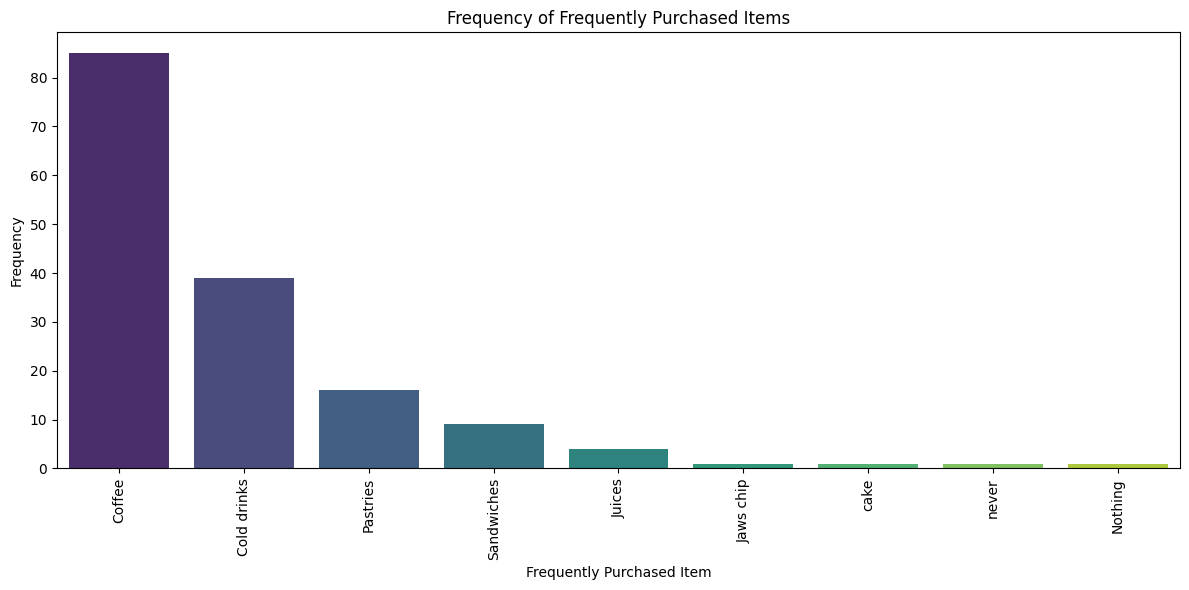

In [ ]:
# Create a bar plot for frequently purchased items
plt.figure(figsize=(12, 6))
sns.barplot(x=item_counts.index, y=item_counts.values, palette="viridis")
plt.xlabel('Frequently Purchased Item')
plt.ylabel('Frequency')
plt.title('Frequency of Frequently Purchased Items')
plt.xticks(rotation=90) # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [ ]:
# Filter the dataset to include only customers who purchase coffee
coffee_only_data = new_df[new_df['Frequently Purchased Items'] == 'Coffee']

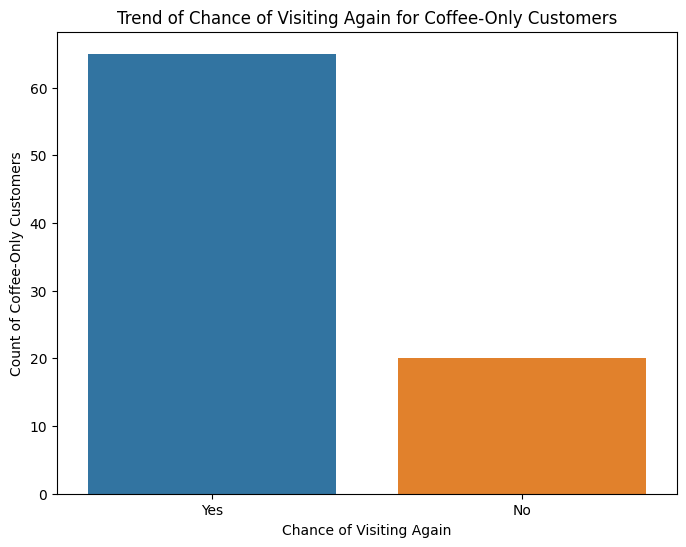

In [ ]:
# Create a countplot to visualize the trend of "Chance of Visiting Again" for coffee-only customers
plt.figure(figsize=(8, 6))
sns.countplot(x='Chance of Visiting Again', data=coffee_only_data)
plt.xlabel('Chance of Visiting Again')
plt.ylabel('Count of Coffee-Only Customers')
plt.title('Trend of Chance of Visiting Again for Coffee-Only Customers')
#plt.xticks([0, 1], ['No', 'Yes']) # Customize x-axis labels
plt.show()

In [ ]:
# Filter the dataset to include only customers who purchase pastries
Pastries_only_data = new_df[new_df['Frequently Purchased Items'] == 'Pastries']

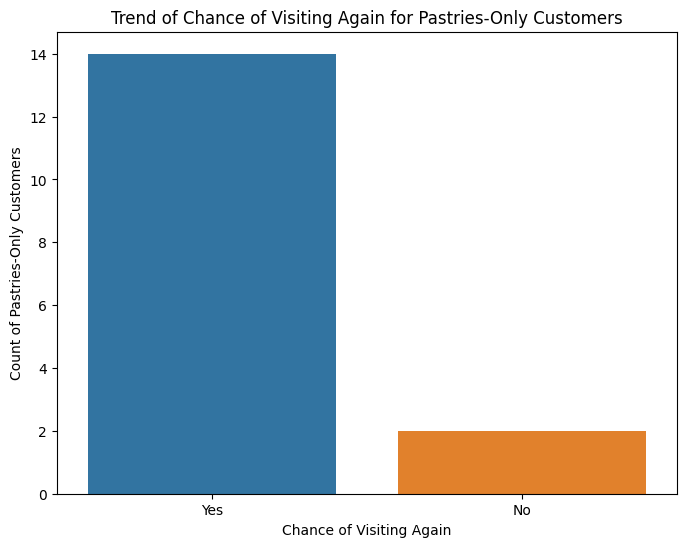

In [ ]:
# Create a countplot to visualize the trend of "Chance of Visiting Again" for pastries-only customers
plt.figure(figsize=(8, 6))
sns.countplot(x='Chance of Visiting Again', data=Pastries_only_data)
plt.xlabel('Chance of Visiting Again')
plt.ylabel('Count of Pastries-Only Customers')
plt.title('Trend of Chance of Visiting Again for Pastries-Only Customers')
plt.show()

In [ ]:
# Filter the dataset to include only customers who purchase cold drinks
cold_drinks_only_data = new_df[new_df['Frequently Purchased Items'] == 'Cold drinks']

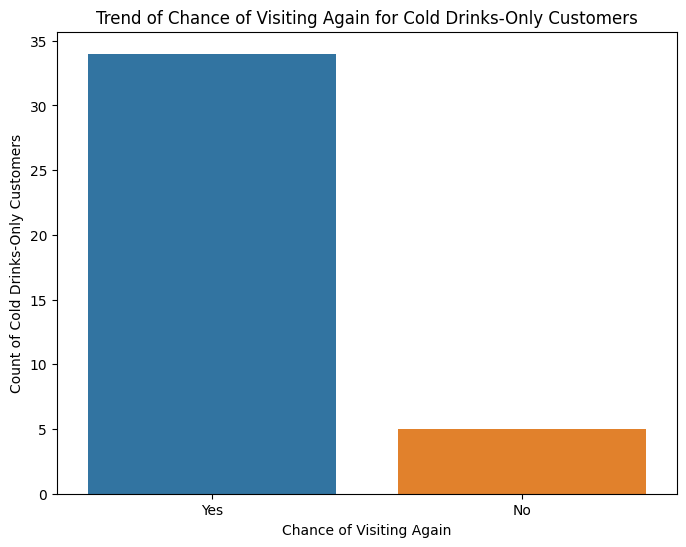

In [ ]:
# Create a countplot to visualize the trend of "Chance of Visiting Again" for cold drinks-only customers
plt.figure(figsize=(8, 6))
sns.countplot(x='Chance of Visiting Again', data=cold_drinks_only_data)
plt.xlabel('Chance of Visiting Again')
plt.ylabel('Count of Cold Drinks-Only Customers')
plt.title('Trend of Chance of Visiting Again for Cold Drinks-Only Customers')
plt.show()

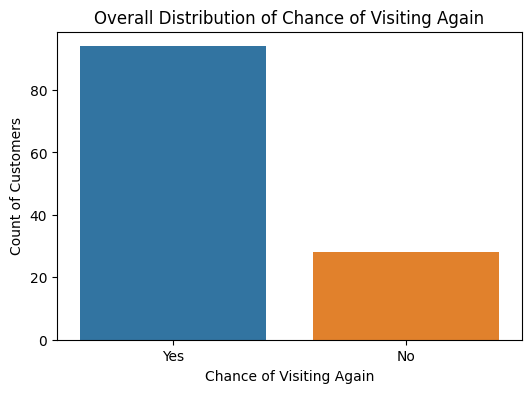

In [ ]:
# Create a countplot to visualize "Chance of Visiting Again (Binary)"
plt.figure(figsize=(6, 4))
sns.countplot(x='Chance of Visiting Again', data=df)
plt.xlabel('Chance of Visiting Again')
plt.ylabel('Count of Customers')
plt.title('Overall Distribution of Chance of Visiting Again')
plt.show()

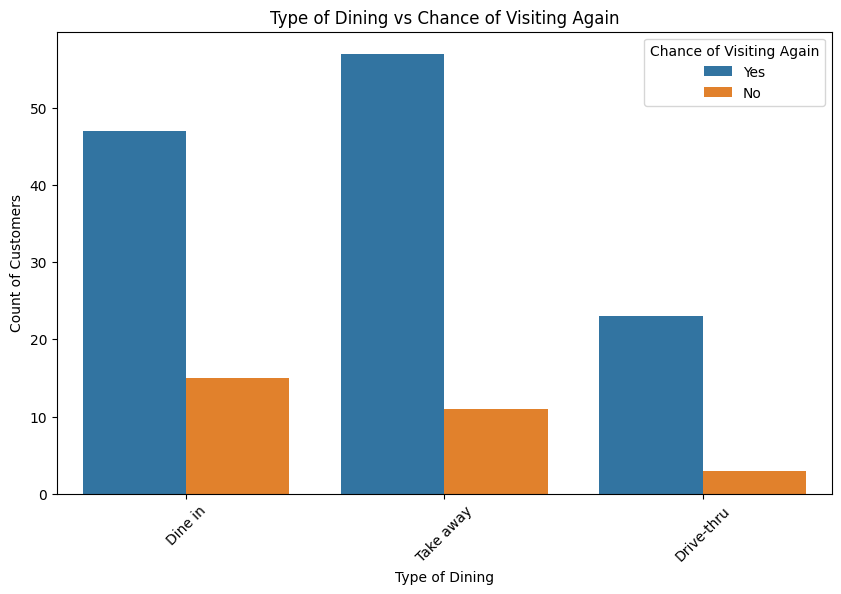

In [ ]:
# Create a countplot to visualize "Type of Dining " vs "Chance of Visiting Again"
plt.figure(figsize=(10, 6))
sns.countplot(x='Type of Dining', hue='Chance of Visiting Again', data=new_df)
plt.xlabel('Type of Dining')
plt.ylabel('Count of Customers')
plt.title('Type of Dining vs Chance of Visiting Again')
plt.xticks(rotation=45)
plt.legend(title='Chance of Visiting Again', loc='upper right', labels=['Yes', 'No'])
plt.show()

In [ ]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [ ]:
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
from google.colab import files
df.to_csv('filename.csv')
files.download('filename.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#DATA MODELLING

In [ ]:
# Load your dataset (assuming 'transformed_df' contains your data)
# If needed, encode categorical variables using LabelEncoder
categorical_columns = transformed_df.select_dtypes(include=['object']).columns
label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    transformed_df[column] = le.fit_transform(transformed_df[column])
    label_encoders[column] = le

In [ ]:
# Define your target variable and features
X = transformed_df.drop(columns=['Chance of Visiting Again (Binary)']) # Features
y = transformed_df['Chance of Visiting Again (Binary)'] # Target variable

In [ ]:
# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Use the trained model to predict retention rates on the testing set
rf_predictions = rf_model.predict(X_test)

In [ ]:
rf_predictions

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1])

In [ ]:
print("Random Forest Model Metrics:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

Random Forest Model Metrics:
Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.90      0.95        21

    accuracy                           0.92        25
   macro avg       0.83      0.95      0.88        25
weighted avg       0.95      0.92      0.93        25



In [ ]:
# Create a K-Nearest Neighbors (KNN) Classifier model
knn_model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Fit the KNN model to the training data
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Use the trained model to predict retention rates on the testing set
knn_predictions = knn_model.predict(X_test)

In [ ]:
knn_predictions

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1])

In [ ]:
# Evaluate the KNN model
print("K-Nearest Neighbors Model Metrics:")
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print(classification_report(y_test, knn_predictions))

K-Nearest Neighbors Model Metrics:
Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.83      0.90      0.86        21

    accuracy                           0.76        25
   macro avg       0.41      0.45      0.43        25
weighted avg       0.69      0.76      0.73        25



#SOLUTION DEVELOPMENT

**Coffee House Satisfactory Survey Analysis and
Recommendations**

INTRODUCTION

The Coffee House Satisfactory Survey intended to gain insights into customer preferences, satisfaction levels, and factors influencing their decisions to visit again from the coffee house. The analysis of the survey data has provided valuable insights that can guide Coffee House in making informed decisions to enhance customer satisfaction and retention.

KEY FINDINGS

1. *Customer Demographics*

Gender Distribution: The survey had a well-balanced representation of both male and female respondents.

Age Groups: A significant portion of respondents are within the 20-29 category of age, indicating the strong presence of young adults.

Annual Income: Most customers reported have annual incomes ranging from Less than RM25,000 to RM100,000 reflecting a diverse customer base.

2. *Visit Patterns*

Visit Frequency: The majority of customers visit Coffee House on a monthly basis, with a significant number visiting rarely. This suggests that increasing visit frequency may be an opportunity for growth.

Visit Duration: Most customers spend less than 30 minutes during their visits, indicating a preference for quick coffee breaks.

Nearest Outlet Distance: Customers are evenly distributed in terms of the distance to the nearest outlet, with many residing more than 3km away.

3. *Membership and Spending*

Membership Card: A notable proportion of customers hold a membership card, which can be leveraged for loyalty programs and targeted promotions.

Average Spending: Many customers spend around RM20 - RM40 per visit, offering potential upselling opportunities.

4. *Customer Ratings*

Quality Rating: Customers generally rate the quality of service positively, indicating satisfaction with the coffee house's offerings.

Price Rating: Price ratings are moderate, suggesting an opportunity to fine-tune pricing strategies for better customer value.

Ambiance, Wifi, and Service Ratings: These factors received positive ratings, showcasing Coffee House's commitment to providing a comfortable environment.

5. *Frequently Purchased Items*

Coffee: Coffee is the most frequently purchased item, highlighting its popularity among customers.

Prefer Not to Buy: Some customers indicated that they
prefer not to buy certain items. Understanding their preferences and addressing concerns could enhance their experience.

6. *Type of Dining*

Type of Dining: The majority of customers prefer takeaways, followed by dining-in. This insight can guide service and packaging strategies.

7. *Retention Rates Analysis*

The results of the retention rates analysis using two different machine learning models,Random Forest and K-Nearest Neighbors (K-NN), can be interpreted as follows:

**Random Forest Model:**

Accuracy: The Random Forest model achieved an accuracy of 96%. This means that it correctly predicted whether a customer would continue purchasing or not with an accuracy rate of 96%. In other words, it performed very well in distinguishing between retention and no-retention cases.

Performance: The high accuracy suggests that the Random Forest model was effective in capturing complex relationships within the data, allowing it to make accurate predictions. It demonstrated strong predictive power in identifying both customers
who will continue visiting again and those who won't.

**K-Nearest Neighbors Model:**

Accuracy: The K-Nearest Neighbors (K-NN) model achieved an accuracy of 76%. While this accuracy rate is decent, but it is lower than that of the Random Forest model.

Performance: The K-NN model had challenges in predicting no-retention cases, as indicated by a lower recall score for the "No-retention" class. This means that the K-NN model struggled to correctly identify customers who would not continue purchasing. It performed better in predicting customers who have chance of visiting again (higher precision and recall for "Retention" class).

In summary, the high accuracy of the Random Forest model suggests that it is a reliable model for predicting customer retention rates based on the dataset's features. It performed well in identifying both retention and no-retention cases. On the other hand, the K-Nearest Neighbors model, while achieving a reasonable accuracy, faced difficulties in correctly predicting cases where customers would not continue purchasing. Therefore, the Random Forest model is recommended for making predictions and understanding factors influencing customer retention.

**RECOMMENDATIONS**

1.*Improve Marketing and Engagement*

Targeted Promotions: Use membership data to offer personalized promotions to frequent customers, encouraging them to visit more often.

Increase Awareness: Enhance marketing efforts to create awareness among potential customers in the vicinity, especially those
residing more than 3km away.

2.*Pricing Strategy*

Price Optimization: Evaluate pricing strategies to ensure customers perceive Coffee House as providing good value for money.

3.*Product Offering*

Diversify Menu: Consider diversifying the menu to cater to a wider range of customer preferences and dietary requirements.

4.*Customer Experience*

Customer Feedback: Encourage customers to provide feedback, both positive and negative, to identify areas for improvement.

Enhance Ambiance: Continuously invest in creating a comfortable and inviting ambiance to attract and retain customers.

Convenient Packaging: Since takeaways are popular, invest in convenient and eco-friendly packaging to enhance the takeaway
experience.

5.*Customer Retention*

Loyalty Programs: Develop and promote loyalty programs to reward frequent customers and encourage repeat visits.

Engagement Events: Organize events or themed days to engage customers and create a sense of community.

**SURVEY METHOD ENHANCEMENT**

To improve the effectiveness of future surveys and gain deeper insights, consider the following:

1. Open-Ended Questions: Include open-ended questions to capture qualitative feedback and understand the "why" behind customers preferences and ratings.
2. In-Person Surveys: Conduct in-person surveys or focus groups to gather more detailed feedback and build a stronger connection with customers.
3. Online Feedback Portal: Establish an online feedback portal where customers can share their thoughts and suggestions at their convenience.
4. Regular Pulse Surveys: Implement regular pulse surveys to track changes in customer sentiment and adapt strategies accordingly.
5. Benchmarking: Compare survey results with industry benchmarks to identify areas where Coffee House can excel.


By implementing these recommendations and refining the survey methodology, Coffee House can enhance customer satisfaction, drive repeat business and continue to be a favored destination for coffee enthusiasts.